In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL

import tensorflow as tf

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.9.2
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [18]:
in_path = 'Data/raw-img/squirrel'
out_path = 'Data/original/squirrel'

i = 0
for p in os.listdir(in_path):
    shutil.copyfile(os.path.join(in_path, p), os.path.join(out_path, f'{in_path.split("/")[-1]}_{i:05}{os.path.splitext(p)[-1]}'))
    i += 1

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'Data/original')

Found 26179 files belonging to 10 classes.


2023-04-05 10:26:41.091595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


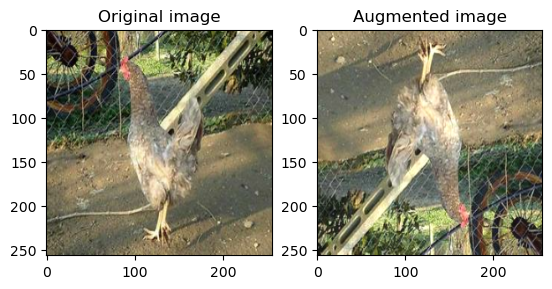

In [34]:
import random

def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

seed = 42

for image, label in train_ds.take(1):
  image = tf.cast(image[0], dtype=tf.float32) / 255.0
  changed = tf.image.stateless_random_flip_left_right(image, seed=(seed, 0))
  changed = tf.image.stateless_random_flip_up_down(changed, seed=(seed, 0))
  changed = tf.image.stateless_random_brightness(changed, max_delta=0.95, seed=(seed, 1))

  visualize(image, changed)